# QUESTION 1: Student Performance

In [3]:
import numpy as np
import pandas as pd

In [4]:
np.random.seed(42)

In [5]:
df = pd.DataFrame({"student_id": range(1, 501),"study_hours": np.random.randint(1, 10, 500),"attendance": np.random.randint(50, 100, 500),"exam_score": np.random.randint(30, 100, 500)})

 Basic inspection

In [6]:
df.head()

,student_id,study_hours,attendance,exam_score
0,1,7,80,37
1,2,4,68,34
2,3,8,93,58
3,4,5,88,76
4,5,7,76,97


In [7]:
df.tail()

,student_id,study_hours,attendance,exam_score
495,496,7,85,85
496,497,9,94,50
497,498,4,73,76
498,499,4,64,88
499,500,6,78,35


In [8]:
df.sample(5)

,student_id,study_hours,attendance,exam_score
56,57,2,81,70
418,419,7,61,71
494,495,1,96,96
217,218,3,52,83
290,291,9,66,44


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   500 non-null    int64
 1   study_hours  500 non-null    int64
 2   attendance   500 non-null    int64
 3   exam_score   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


Feauture Engineering

In [11]:
df["performance"] = pd.cut(
    df["exam_score"],
    bins=[0, 50, 75, 100],
    labels=["Low", "Medium", "High"]
)

Statistical Analysis

In [12]:
df.describe()

,student_id,study_hours,attendance,exam_score
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4.906000,73.926000,64.308000
std,144.481833,2.612051,14.456227,19.808733
min,1.000000,1.000000,50.000000,30.000000
25%,125.750000,3.000000,61.000000,47.000000
50%,250.500000,5.000000,75.000000,65.000000
75%,375.250000,7.000000,86.000000,82.000000
max,500.000000,9.000000,99.000000,99.000000


In [13]:
df[["study_hours", "attendance", "exam_score"]].mean()

,0
study_hours,4.906
attendance,73.926
exam_score,64.308


Group Analysis

In [14]:
df.groupby("performance")["exam_score"].agg(["mean", "min", "max", "count"])

/tmp/ipython-input-3319253712.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("performance")["exam_score"].agg(["mean", "min", "max", "count"])


,mean,min,max,count
performance,,,,
Low,39.958904,30,50,146
Medium,62.881720,51,75,186
High,87.047619,76,99,168


Filtering

In [15]:
high_performers = df[(df["study_hours"] > 6) & (df["attendance"] > 80)]

Sorting

In [16]:
df.sort_values("exam_score", ascending=False).head(10)

,student_id,study_hours,attendance,exam_score,performance
447,448,1,89,99,High
340,341,3,80,99,High
393,394,7,51,99,High
179,180,2,76,99,High
255,256,3,85,99,High
72,73,9,90,99,High
152,153,3,52,98,High
13,14,6,77,98,High
398,399,2,50,98,High
221,222,8,78,98,High


Correlation

In [17]:
df.corr(numeric_only=True)

,student_id,study_hours,attendance,exam_score
student_id,1.000000,-0.047810,-0.017097,0.028112
study_hours,-0.047810,1.000000,0.046094,-0.005830
attendance,-0.017097,0.046094,1.000000,-0.042155
exam_score,0.028112,-0.005830,-0.042155,1.000000


# Visualization (Matplotlib + Seaborn)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Pairplot

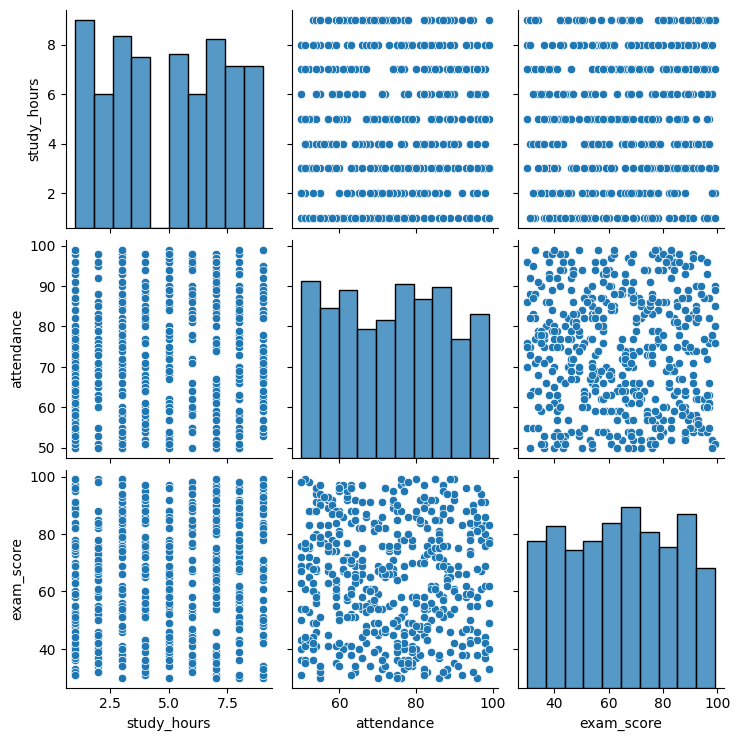

In [19]:
sns.pairplot(df[["study_hours", "attendance", "exam_score"]])
plt.show()

Heatmap

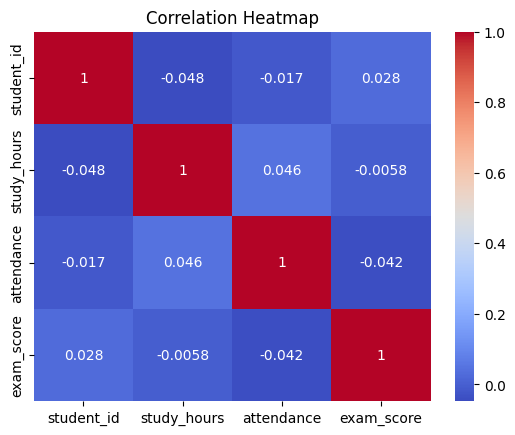

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Boxplot

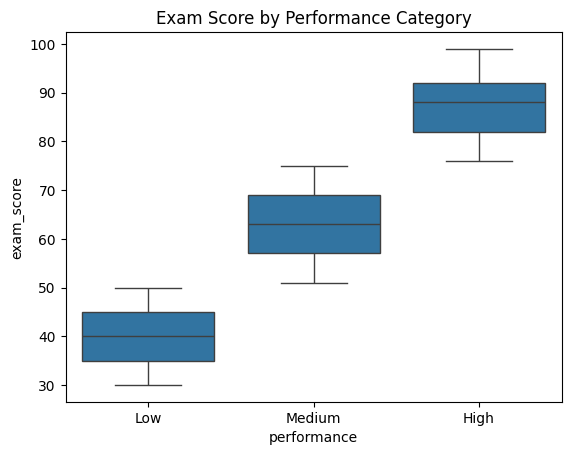

In [21]:
sns.boxplot(x="performance", y="exam_score", data=df)
plt.title("Exam Score by Performance Category")
plt.show()

Lineplot sorted

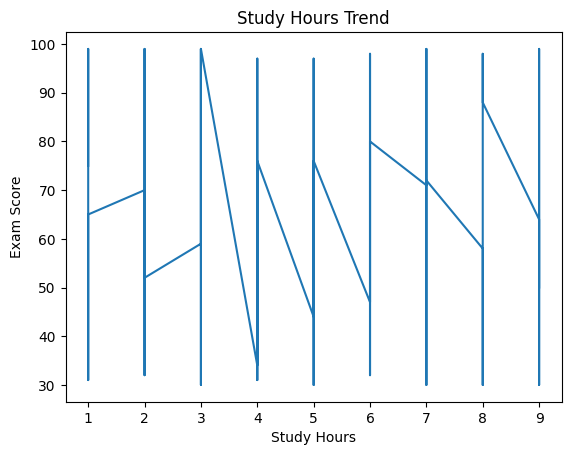

In [22]:
df_sorted = df.sort_values("study_hours")
plt.plot(df_sorted["study_hours"], df_sorted["exam_score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours Trend")
plt.show()

# QUESTION 2: Employee Analytics

Dataset Creation

In [23]:
np.random.seed(10)

In [25]:
df = pd.DataFrame({
    "employee_id": range(1, 501),
    "experience_years": np.random.randint(0, 20, 500),
    "salary": np.random.randint(20000, 150000, 500),
    "performance_rating": np.random.randint(1, 6, 500),
    "department": np.random.choice(["IT", "HR", "Sales", "Finance"], 500)
})

Inspection

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         500 non-null    int64 
 1   experience_years    500 non-null    int64 
 2   salary              500 non-null    int64 
 3   performance_rating  500 non-null    int64 
 4   department          500 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


In [27]:
df.describe(include="all")

,employee_id,experience_years,salary,performance_rating,department
count,500.000000,500.000000,500.000000,500.000000,500
unique,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,HR
freq,NaN,NaN,NaN,NaN,128
mean,250.500000,9.768000,85734.504000,2.974000,NaN
std,144.481833,5.896415,37764.998663,1.421748,NaN
min,1.000000,0.000000,20135.000000,1.000000,NaN
25%,125.750000,5.000000,53242.000000,2.000000,NaN
50%,250.500000,10.000000,86474.000000,3.000000,NaN
75%,375.250000,15.000000,118165.250000,4.000000,NaN


GroupBy with multiple columns

In [28]:
df.groupby("department")["salary"].agg(["mean", "median", "max"])

,mean,median,max
department,,,
Finance,81765.471074,78103.0,149792
HR,89800.867188,94153.5,149927
IT,85814.166667,79562.5,149722
Sales,85332.272000,87230.0,149897


Pivot Table

In [30]:
pd.pivot_table(
    df,
    values="salary",
    index="department",
    columns="performance_rating",
    aggfunc="mean"
)

performance_rating,1,2,3,4,5
department,,,,,
Finance,82720.923077,76804.807692,83619.500000,82036.041667,84187.920000
HR,97866.692308,90268.281250,85418.960000,79886.210526,92618.461538
IT,90444.909091,79540.033333,91832.444444,79517.652174,88675.583333
Sales,85739.111111,102458.947368,89882.800000,75612.714286,78485.846154


Ranking

In [31]:
df["salary_rank"] = df["salary"].rank(ascending=False)

conditional column

In [32]:
df["level"] = np.where(df["experience_years"] >= 10, "Senior", "Junior")

Value Count

In [33]:
df["department"].value_counts(normalize=True)

,proportion
department,
HR,0.256
IT,0.252
Sales,0.250
Finance,0.242


# Visualization

Salary Distribution

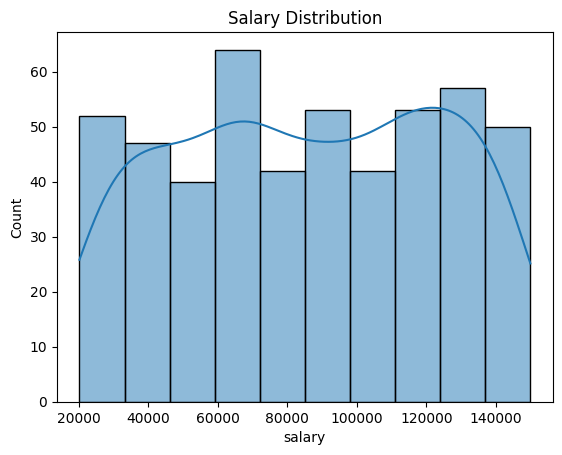

In [34]:
sns.histplot(df["salary"], kde=True)
plt.title("Salary Distribution")
plt.show()

Experience vs salary

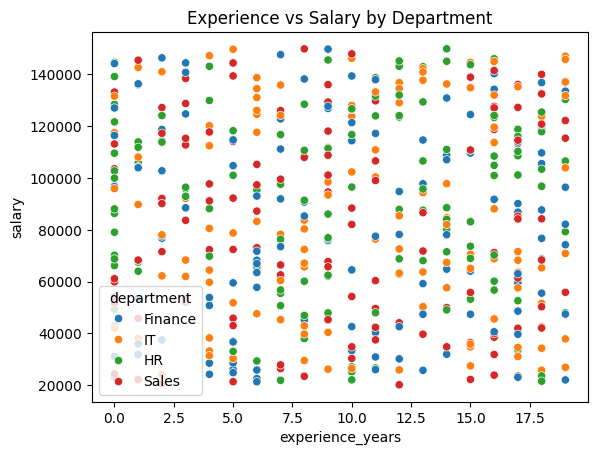

In [35]:
sns.scatterplot(x="experience_years", y="salary", hue="department", data=df)
plt.title("Experience vs Salary by Department")
plt.show()

Bar plot

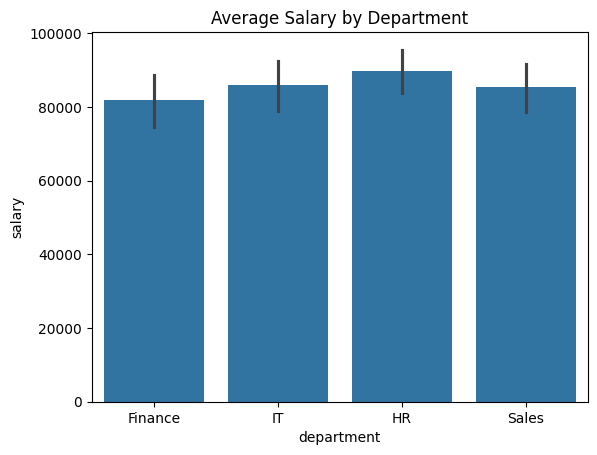

In [36]:
sns.barplot(x="department", y="salary", data=df)
plt.title("Average Salary by Department")
plt.show()

Box plot

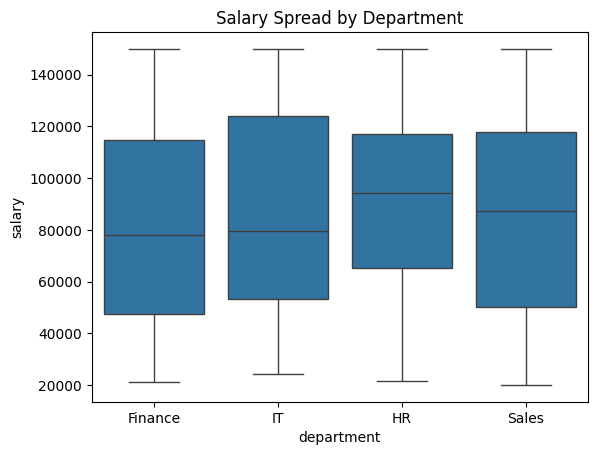

In [37]:
sns.boxplot(x="department", y="salary", data=df)
plt.title("Salary Spread by Department")
plt.show()

# QUESTION 3: Sales & Customer Analytics


In [38]:
np.random.seed(5)

In [39]:
df = pd.DataFrame({
    "day": pd.date_range("2024-01-01", periods=500),
    "units_sold": np.random.randint(1, 60, 500),
    "price": np.random.randint(100, 1000, 500),
    "customer_rating": np.random.uniform(1, 5, 500)
})

Inspection

In [40]:
df.head(5)

,day,units_sold,price,customer_rating
0,2024-01-01,36,945,2.284716
1,2024-01-02,15,773,1.865399
2,2024-01-03,48,676,1.699030
3,2024-01-04,39,999,3.207362
4,2024-01-05,55,450,3.558515


In [41]:
df.tail(5)

,day,units_sold,price,customer_rating
495,2025-05-10,14,705,1.477246
496,2025-05-11,52,375,2.003696
497,2025-05-12,10,843,4.988959
498,2025-05-13,42,732,4.898006
499,2025-05-14,6,227,4.577687


In [43]:
df.sample(5)

,day,units_sold,price,customer_rating
210,2024-07-29,10,919,1.203286
88,2024-03-29,17,170,4.640123
259,2024-09-16,38,505,1.930685
41,2024-02-11,6,574,1.698115
338,2024-12-04,47,509,1.593248


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   day              500 non-null    datetime64[ns]
 1   units_sold       500 non-null    int64         
 2   price            500 non-null    int64         
 3   customer_rating  500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.8 KB


Feature Engineering

In [49]:
df['product quality'] = pd.cut(
    df['customer_rating'],
    bins=[1,2.5,4,5],
    labels=['Low quality','Medium quality', 'High quality']
)

Statistical Analysis

In [50]:
df.describe()

,day,units_sold,price,customer_rating
count,500,500.000000,500.000000,500.000000
mean,2024-09-06 12:00:00,28.440000,528.916000,2.961798
min,2024-01-01 00:00:00,1.000000,101.000000,1.004692
25%,2024-05-04 18:00:00,14.000000,293.250000,2.026971
50%,2024-09-06 12:00:00,28.000000,519.000000,3.023700
75%,2025-01-09 06:00:00,43.000000,747.000000,3.814543
max,2025-05-14 00:00:00,59.000000,999.000000,4.988959
std,NaN,17.017332,262.351905,1.118583


In [51]:
df[['units_sold','price','customer_rating']].mean()

,0
units_sold,28.440000
price,528.916000
customer_rating,2.961798


Grouping

In [54]:
df.groupby('product quality')['customer_rating'].agg(['mean', 'min', 'max', 'count'])

/tmp/ipython-input-503754142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('product quality')['customer_rating'].agg(['mean', 'min', 'max', 'count'])


,mean,min,max,count
product quality,,,,
Low quality,1.731909,1.004692,2.484778,182
Medium quality,3.256378,2.508659,3.992384,214
High quality,4.507948,4.019498,4.988959,104


Sorting

In [59]:
df.sort_values("customer_rating", ascending=False).head(10)

,day,units_sold,price,customer_rating,product quality
497,2025-05-12,10,843,4.988959,High quality
355,2024-12-21,47,487,4.976977,High quality
85,2024-03-26,10,147,4.974444,High quality
387,2025-01-22,19,429,4.956984,High quality
153,2024-06-02,5,106,4.933830,High quality
284,2024-10-11,3,618,4.907043,High quality
310,2024-11-06,32,341,4.906838,High quality
498,2025-05-13,42,732,4.898006,High quality
457,2025-04-02,59,196,4.893085,High quality
71,2024-03-12,4,807,4.891981,High quality


# Visualization

Boxplot

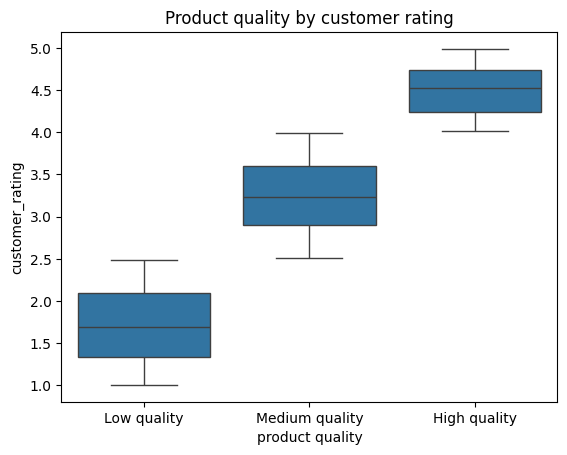

In [60]:
sns.boxplot(x="product quality", y="customer_rating", data=df)
plt.title("Product quality by customer rating")
plt.show()

Pair plot

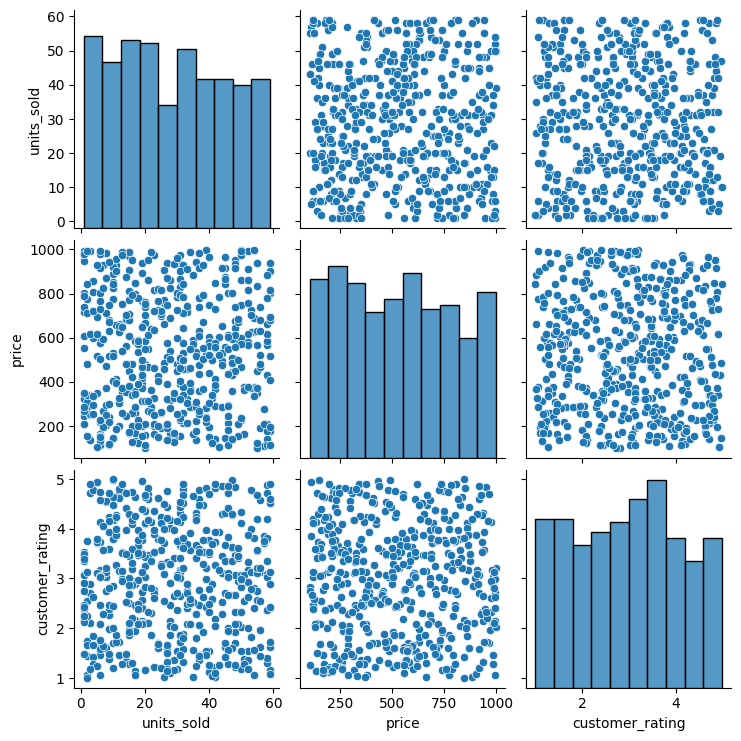

In [61]:
sns.pairplot(df[["units_sold",	"price" ,	"customer_rating"]])
plt.show()

Customer rating vs price

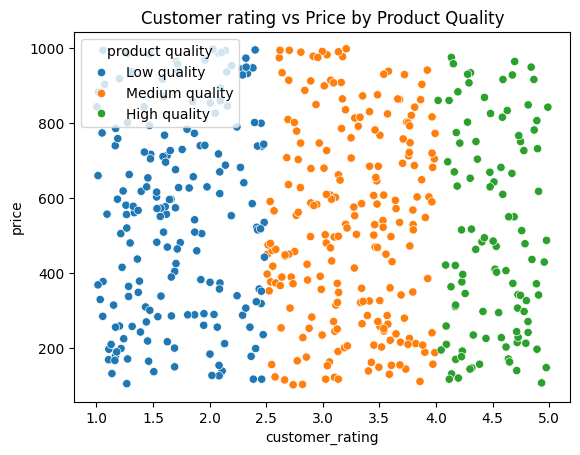

In [62]:
sns.scatterplot(x="customer_rating", y="price", hue="product quality", data=df)
plt.title("Customer rating vs Price by Product Quality")
plt.show()

Customer Rating vs units sold

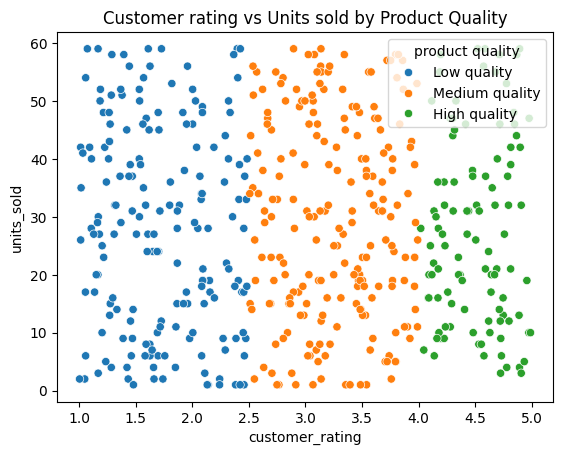

In [63]:
sns.scatterplot(x="customer_rating", y="units_sold", hue="product quality", data=df)
plt.title("Customer rating vs Units sold by Product Quality")
plt.show()

Price Distribution

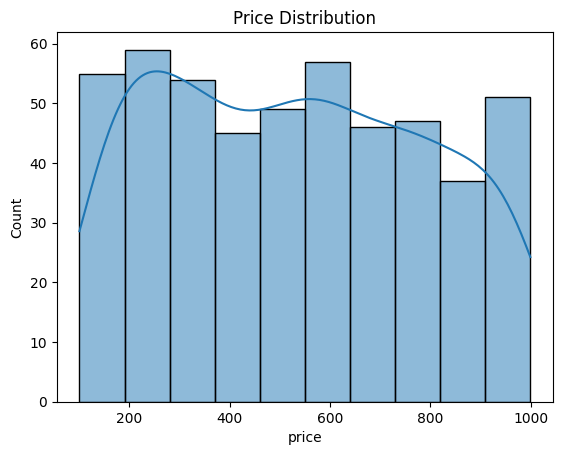

In [64]:
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

Daily products sale

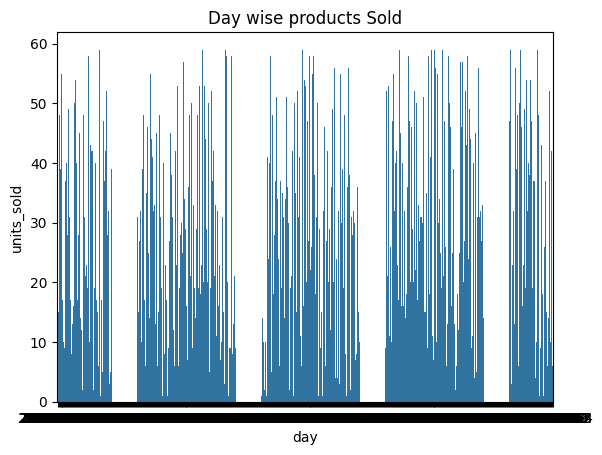

In [65]:
sns.barplot(x="day", y="units_sold", data=df)
plt.title("Day wise products Sold")
plt.show()